# Finding out the calories burnt by using machine learning

In [2]:
#importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
 
import warnings
warnings.filterwarnings("ignore")

In [3]:
exr = pd.read_csv('exercise.csv')

In [4]:
exr.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
cal =pd.read_csv('calories.csv')
cal.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
# lets conact both the data frames

df = pd.concat([exr, cal['Calories']], axis=1)

In [7]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


We don't need User_ID so lets drop it

In [8]:
fdf=df.drop(['User_ID'],axis=1)

In [9]:
fdf.shape

(15000, 8)

In [10]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


Checking null values

In [11]:
fdf.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

There ain't any null values good to go

In [12]:
# get some statistical measures about the data
fdf.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


The Avg temperature of body is 37 degree celcius here it is 40 that means more body heat generated will result in more calorie burn and same goes for Heat_rate lets visulize this by seeing a correlation heat map

In [13]:
corr = fdf.corr()

<Axes: >

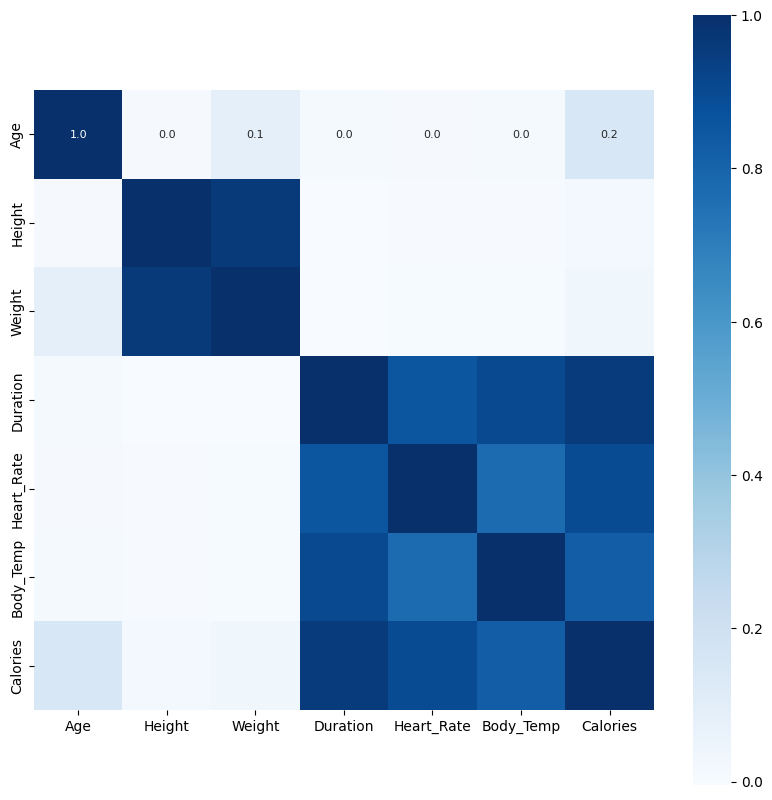

In [14]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

So as we see there is a positive correlation between Body_Temp	& 	Heart_Rate for calories burning


In [15]:
# Visualization of data
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

<Axes: xlabel='Age', ylabel='Density'>

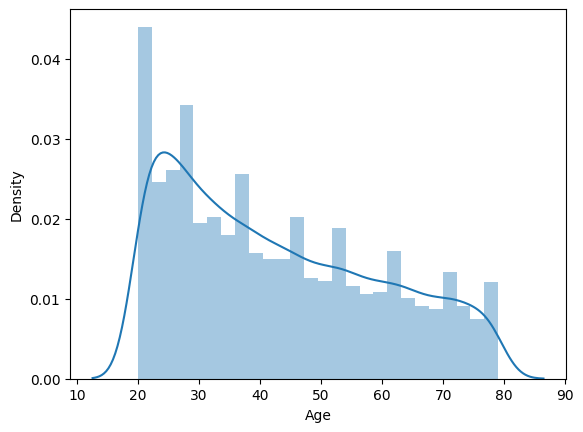

In [16]:
# finding the distribution of "Age" column
sns.distplot(fdf['Age'])

<Axes: xlabel='Weight', ylabel='Density'>

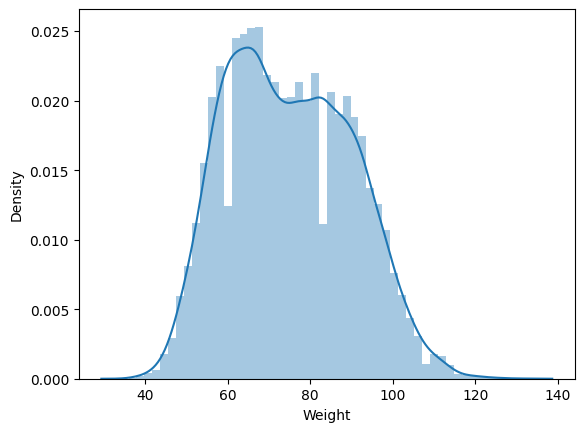

In [17]:
# finding the distribution of "Weight" column
sns.distplot(fdf['Weight'])

<Axes: xlabel='Height', ylabel='Density'>

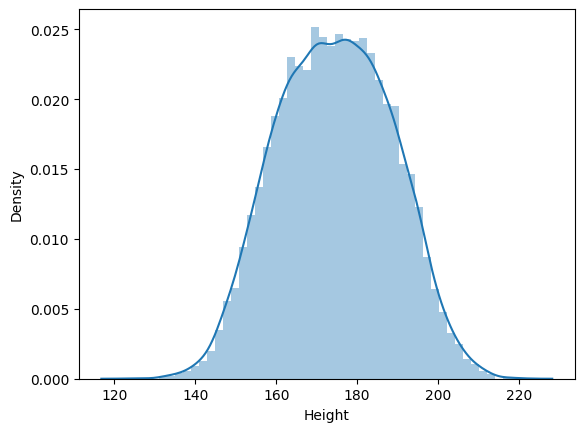

In [18]:
# finding the distribution of "Height" column
sns.distplot(fdf['Height'])

<Axes: xlabel='Duration', ylabel='Density'>

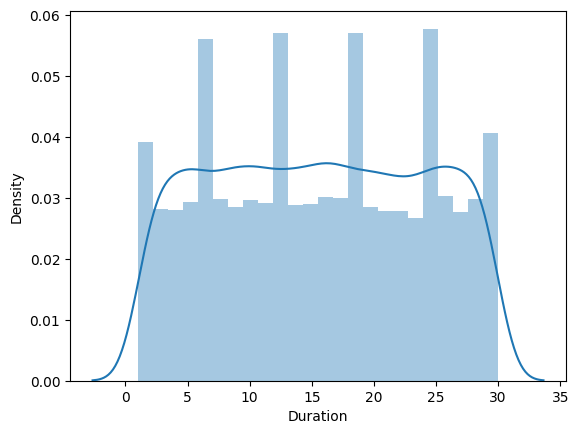

In [19]:
# finding the distribution of "Duration" column
sns.distplot(fdf['Duration'])

<Axes: xlabel='Heart_Rate', ylabel='Density'>

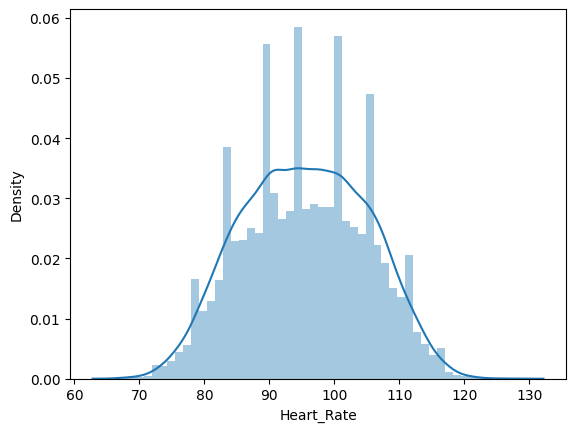

In [20]:
# finding the distribution of "Heart_Rate" column
sns.distplot(fdf['Heart_Rate'])

<Axes: xlabel='Body_Temp', ylabel='Density'>

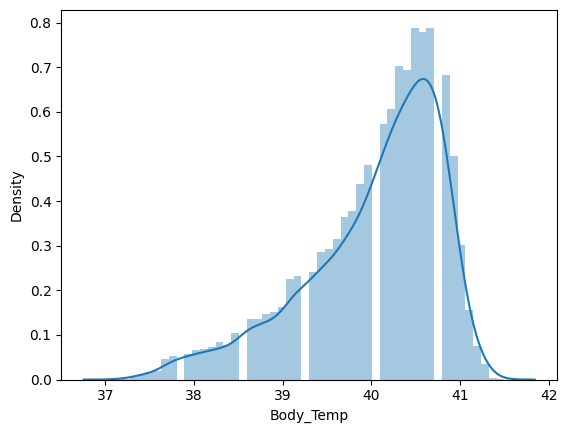

In [21]:
# finding the distribution of "Body_Temp" column
sns.distplot(fdf['Body_Temp'])

<Axes: xlabel='Calories', ylabel='Density'>

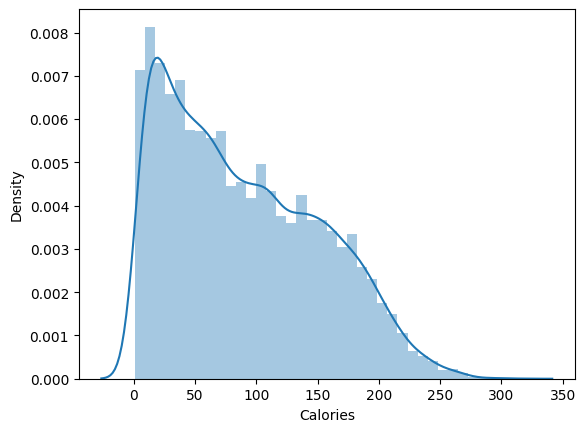

In [22]:
# finding the distribution of "Calories" column
sns.distplot(fdf['Calories'])

As Gender is not much required feature because as we see Basically we calculate value here by using Heart_Rate and Body_Temp and other physical features so we will drop Gender column

In [23]:
data=fdf.drop(['Gender'],axis=1)

In [24]:
data.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,69,179.0,79.0,5.0,88.0,38.7,26.0
3,34,179.0,71.0,13.0,100.0,40.5,71.0
4,27,154.0,58.0,10.0,81.0,39.8,35.0


Splitting data for modelling

In [25]:
X=data.drop(['Calories'],axis=1)
y=data['Calories']

print(X.shape)
print(y.shape)

(15000, 6)
(15000,)


In [26]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(12000, 6) (12000,) (3000, 6) (3000,)


# Model Training and Evaluation

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

XG Boost Regressor

In [28]:
from xgboost import XGBRegressor

xgb=XGBRegressor()

xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

mae 2.4750957059264183
mse 18.118087070970734
r2_score 0.9955106483640869
rmse 4.256534631712837


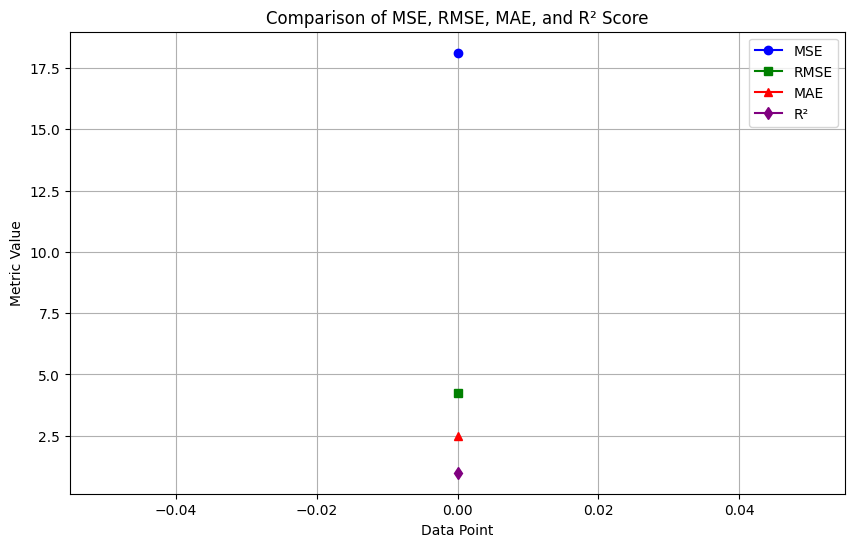

In [29]:
pred=xgb.predict(X_test)

mae=mean_absolute_error(y_test,pred)
mse=mean_squared_error(y_test,pred)
r2=r2_score(y_test,pred)
rmse=mse**0.5

print('mae',mae)
print('mse',mse)
print('r2_score',r2)
print('rmse',rmse)


# Create the plot
plt.figure(figsize=(10, 6))

plt.plot(mse, label="MSE", marker='o', color='b')
plt.plot(rmse, label="RMSE", marker='s', color='g')
plt.plot(mae, label="MAE", marker='^', color='r')
plt.plot(r2, label="R²", marker='d', color='purple')

plt.xlabel("Data Point")
plt.ylabel("Metric Value")
plt.title("Comparison of MSE, RMSE, MAE, and R² Score")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()

rf.fit(X_train,y_train)


RandomForestRegressor()

mae 2.5260233333333333
mse 18.647356366666667
r2_score 0.9953795044983375
rmse 4.318258487708519


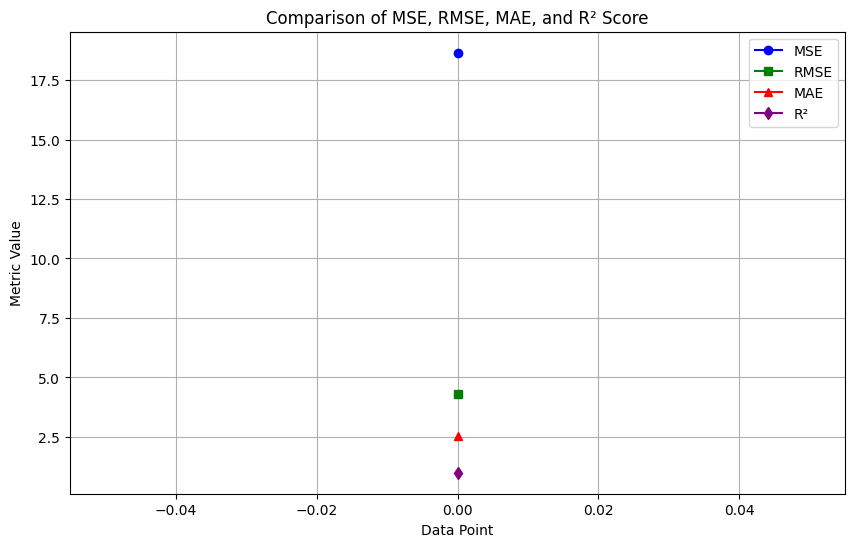

In [31]:
pred=rf.predict(X_test)

mae=mean_absolute_error(y_test,pred)
mse=mean_squared_error(y_test,pred)
r2=r2_score(y_test,pred)
rmse=mse**0.5

print('mae',mae)
print('mse',mse)
print('r2_score',r2)
print('rmse',rmse)


# Create the plot
plt.figure(figsize=(10, 6))

plt.plot(mse, label="MSE", marker='o', color='b')
plt.plot(rmse, label="RMSE", marker='s', color='g')
plt.plot(mae, label="MAE", marker='^', color='r')
plt.plot(r2, label="R²", marker='d', color='purple')

plt.xlabel("Data Point")
plt.ylabel("Metric Value")
plt.title("Comparison of MSE, RMSE, MAE, and R² Score")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


Decision Tree

In [32]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()

dt.fit(X_test,y_test)

DecisionTreeRegressor()

mae 0.0
mse 0.0
r2_score 1.0
rmse 0.0


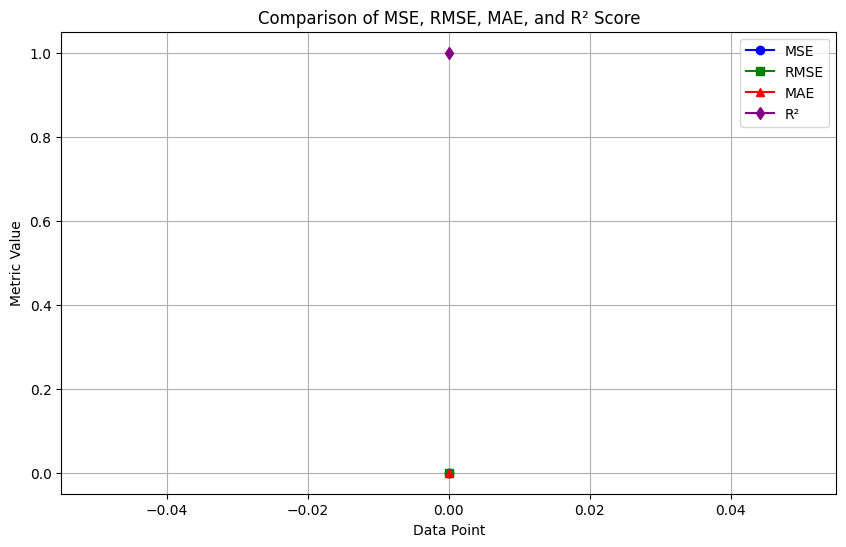

In [33]:
pred=dt.predict(X_test)

mae=mean_absolute_error(y_test,pred)
mse=mean_squared_error(y_test,pred)
r2=r2_score(y_test,pred)
rmse=mse**0.5

print('mae',mae)
print('mse',mse)
print('r2_score',r2)
print('rmse',rmse)


# Create the plot
plt.figure(figsize=(10, 6))

plt.plot(mse, label="MSE", marker='o', color='b')
plt.plot(rmse, label="RMSE", marker='s', color='g')
plt.plot(mae, label="MAE", marker='^', color='r')
plt.plot(r2, label="R²", marker='d', color='purple')

plt.xlabel("Data Point")
plt.ylabel("Metric Value")
plt.title("Comparison of MSE, RMSE, MAE, and R² Score")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


As we see Decision Trees Regressor perform best and gives perfect score so we finalise it as final model

In [35]:
import pickle

pickle.dump(dt, open("cal_burn.pkl", "wb"))  

loaded_model = pickle.load(open("cal_burn.pkl", "rb"))

In [36]:
pred = loaded_model.predict(X_test)

mae=mean_absolute_error(y_test,pred)
mse=mean_squared_error(y_test,pred)
r2=r2_score(y_test,pred)
rmse=mse**0.5

print('mae',mae)
print('mse',mse)
print('r2_score',r2)
print('rmse',rmse)



mae 0.0
mse 0.0
r2_score 1.0
rmse 0.0
